In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from scipy.optimize import fsolve
from numpy.linalg import inv
import scipy.integrate

In [2]:
def p1(X,mu1):
    return norm.pdf(X,mu1,1)
def p2(X,mu2):
    return norm.pdf(X,mu2,1)
def f(X,lamda,mu1,mu2):
    return (lamda*p1(X,mu1)+(1-lamda)*p2(X,mu2))

In [3]:
N=1000
alpha=0.05
z=norm.ppf(1-alpha/2)
pi=math.pi
F_inverse=[]
H_inverse=[]
lamda_MLE=[]
mu1_MLE=[]
mu2_MLE=[]
while len(H_inverse)<N:
    n=100
    X=[]
    U=np.random.uniform(0,1,n)
    for i in range(n):
        X.append((fsolve(lambda x: 0.5*norm.cdf(x)+0.5*norm.cdf(x-2)-U[i], 0)[0]))
    def ML(paramlist):
        lamda,mu1,mu2=paramlist[0],paramlist[1],paramlist[2]
        s1=0
        s2=0
        s3=0
        for i in range(n):
            s1=s1-(p1(X[i],mu1)-p2(X[i],mu2))/(f(X[i],lamda,mu1,mu2))
            s2=s2-lamda*p1(X[i],mu1)*(X[i]-mu1)/(f(X[i],lamda,mu1,mu2))
            s3=s3-(1-lamda)*p2(X[i],mu2)*(X[i]-mu2)/(f(X[i],lamda,mu1,mu2))
        return s1,s2,s3
    lamda_hat,mu1_hat,mu2_hat=fsolve(ML,[0.5,0,2])
    lamda_MLE.append(lamda_hat)
    mu1_MLE.append(mu1_hat)
    mu2_MLE.append(mu2_hat)
    h11=0
    h12=0
    h13=0
    h22=0
    h23=0
    h33=0
    for i in range(len(X)):
        h11=h11+(1/n)*(p1(X[i],mu1_hat)-p2(X[i],mu2_hat))**2/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h12=h12-(1/n)*(p1(X[i],mu1_hat)*(X[i]-mu1_hat)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-p1(X[i],mu1_hat)*(X[i]-mu1_hat)*lamda_hat*(p1(X[i],mu1_hat)-p2(X[i],mu2_hat)))/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h13=h13-(1/n)*(-p2(X[i],mu2_hat)*(X[i]-mu2_hat)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-p2(X[i],mu2_hat)*(X[i]-mu2_hat)*(1-lamda_hat)*(p1(X[i],mu1_hat)-p2(X[i],mu2_hat)))/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h22=h22-(1/n)*(lamda_hat*p1(X[i],mu1_hat)*(-1+(X[i]-mu1_hat)**2)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-(p1(X[i],mu1_hat)*(X[i]-mu1_hat)*lamda_hat)**2)/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h33=h33-(1/n)*((1-lamda_hat)*p2(X[i],mu2_hat)*(-1+(X[i]-mu2_hat)**2)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-(p2(X[i],mu2_hat)*(X[i]-mu2_hat)*(1-lamda_hat))**2)/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h23=h23+(1/n)*(p1(X[i],mu1_hat)*(X[i]-mu1_hat)*lamda_hat*p2(X[i],mu2_hat)*(X[i]-mu2_hat)*(1-lamda_hat))/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
    H=[[h11,h12,h13],[h12,h22,h23],[h13,h23,h33]]
    if inv(H).min()>0 and inv(H).max()<100:
        a11= lambda x:(p1(x,mu1_hat)-p2(x,mu2_hat))**2/f(x,lamda_hat,mu1_hat,mu2_hat)
        a22= lambda x:(lamda_hat*(x-mu1_hat)*p1(x,mu1_hat))**2/f(x,lamda_hat,mu1_hat,mu2_hat)
        a33= lambda x:((1-lamda_hat)*(x-mu2_hat)*p2(x,mu2_hat))**2/f(x,lamda_hat,mu1_hat,mu2_hat)
        a12= lambda x:(p1(x,mu1_hat)-p2(x,mu2_hat))*(lamda_hat*(x-mu1_hat)*p1(x,mu1_hat))/f(x,lamda_hat,mu1_hat,mu2_hat)
        a13= lambda x:(p1(x,mu1_hat)-p2(x,mu2_hat))*((1-lamda_hat)*(x-mu2_hat)*p2(x,mu2_hat))/f(x,lamda_hat,mu1_hat,mu2_hat)
        a23 = lambda x:(lamda_hat*(x-mu1_hat)*p1(x,mu1_hat))*((1-lamda_hat)*(x-mu2_hat)*p2(x,mu2_hat))/f(x,lamda_hat,mu1_hat,mu2_hat)
        f11 = scipy.integrate.quad(a11, -35, 35)[0]
        f22 = scipy.integrate.quad(a22, -35, 35)[0]
        f33 = scipy.integrate.quad(a33, -35, 35)[0]
        f12 = scipy.integrate.quad(a12, -35, 35)[0]
        f13 = scipy.integrate.quad(a13, -35, 35)[0]
        f23 = scipy.integrate.quad(a23, -35, 35)[0]
        F=[[f11,f12,f13],[f12,f22,f23],[f13,f23,f33]]
        F_inverse.append(inv(F))
        H_inverse.append(inv(H))

C:\Users\jsh98\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jsh98\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jsh98\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jsh98\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\jsh98\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [39]:
(F_inverse)

[array([[2.39189305, 3.63889762, 3.90060634],
        [3.63889762, 8.57301711, 6.10920149],
        [3.90060634, 6.10920149, 9.75319549]]),
 array([[0.77172377, 1.07573201, 1.43539172],
        [1.07573201, 4.05027845, 2.67660722],
        [1.43539172, 2.67660722, 6.66431963]]),
 array([[0.55261927, 1.13191937, 0.66772909],
        [1.13191937, 7.19366169, 2.12126771],
        [0.66772909, 2.12126771, 2.97580508]]),
 array([[ 1.10354496,  2.92619666,  1.41017033],
        [ 2.92619666, 13.91849256,  4.22232745],
        [ 1.41017033,  4.22232745,  3.76701493]]),
 array([[2.20770244, 3.73143104, 3.30563069],
        [3.73143104, 9.84151607, 5.80210676],
        [3.30563069, 5.80210676, 7.86475831]]),
 array([[ 8.44598096, 10.22953278, 12.06880053],
        [10.22953278, 15.39865026, 14.06770209],
        [12.06880053, 14.06770209, 21.19154668]]),
 array([[1.31096256, 1.90315369, 2.49360904],
        [1.90315369, 5.36530339, 4.08311736],
        [2.49360904, 4.08311736, 8.72593958]]),
 a

In [40]:
(H_inverse)

[array([[2.20844503, 3.41642775, 3.46953097],
        [3.41642775, 8.34701127, 5.53874258],
        [3.46953097, 5.53874258, 8.79217032]]),
 array([[0.59894057, 0.71268405, 0.9844145 ],
        [0.71268405, 3.30952431, 1.69741819],
        [0.9844145 , 1.69741819, 5.5324909 ]]),
 array([[0.46334572, 0.9213468 , 0.43505375],
        [0.9213468 , 6.87554623, 1.47976884],
        [0.43505375, 1.47976884, 2.4174807 ]]),
 array([[ 1.76327926,  4.99037022,  2.4796565 ],
        [ 4.99037022, 20.28565411,  7.60540659],
        [ 2.4796565 ,  7.60540659,  5.48583633]]),
 array([[1.87729649, 3.11787812, 2.7345461 ],
        [3.11787812, 8.72409039, 4.72273693],
        [2.7345461 , 4.72273693, 6.89394506]]),
 array([[ 9.06304933, 11.01111829, 12.9630057 ],
        [11.01111829, 16.3746504 , 15.21732067],
        [12.9630057 , 15.21732067, 22.46663971]]),
 array([[ 1.77052385,  2.58626217,  3.7568129 ],
        [ 2.58626217,  6.32443022,  6.03946392],
        [ 3.7568129 ,  6.03946392, 12.088129

In [6]:
ff=0
hh=0
for i in range(len(H_inverse)):
    ff=ff+F_inverse[i]
    hh=hh+H_inverse[i]

In [7]:
F_inverse_bar=ff/N
F_inverse_bar

array([[1.56461191, 2.51927398, 2.57654244],
       [2.51927398, 7.68185764, 4.46921875],
       [2.57654244, 4.46921875, 7.91694069]])

In [8]:
H_inverse_bar=hh/N
H_inverse_bar

array([[1.55088539, 2.5078637 , 2.58165931],
       [2.5078637 , 7.74406107, 4.47257144],
       [2.58165931, 4.47257144, 8.00892356]])

In [9]:
v11=np.cov(lamda_MLE,mu1_MLE)[0][0]*100
v12=np.cov(lamda_MLE,mu1_MLE)[0][1]*100
v22=np.cov(lamda_MLE,mu1_MLE)[1][1]*100
v13=np.cov(lamda_MLE,mu2_MLE)[0][1]*100
v33=np.cov(lamda_MLE,mu2_MLE)[1][1]*100
v23=np.cov(mu1_MLE,mu2_MLE)[0][1]*100

In [10]:
V=[[v11,v12,v13],[v12,v22,v23],[v13,v23,v33]]

In [11]:
V

[[1.4195358349070848, 2.8577624854500328, 2.4927135840289005],
 [2.8577624854500328, 10.817337678959298, 5.517306652702897],
 [2.4927135840289005, 5.517306652702897, 7.934538007778881]]

In [12]:
from numpy import linalg as LA
dF=[]
dH=[]
for i in range(len(F_inverse)):
    dF.append(LA.norm(F_inverse[i]-V))
    dH.append(LA.norm(H_inverse[i]-V))

In [13]:
mF=np.argsort(dF)[len(dF)//2]
mH=np.argsort(dH)[len(dH)//2]

In [14]:
F_inverse[mF]

array([[0.86904657, 1.73135823, 1.20167234],
       [1.73135823, 7.74709646, 3.02449363],
       [1.20167234, 3.02449363, 4.09284555]])

In [15]:
H_inverse[mH]

array([[0.96189625, 1.55902388, 1.45481632],
       [1.55902388, 5.8516153 , 2.86065865],
       [1.45481632, 2.86065865, 5.18773457]])

In [16]:
gh11=[]
gf11=[]
gh22=[]
gf22=[]
gh33=[]
gf33=[]
for i in range(len(H_inverse)):
    gh11.append(2*norm.cdf(z*(H_inverse[i][0][0]/v11)**0.5)-1)
    gf11.append(2*norm.cdf(z*(F_inverse[i][0][0]/v11)**0.5)-1)
    gh22.append(2*norm.cdf(z*(H_inverse[i][1][1]/v22)**0.5)-1)
    gf22.append(2*norm.cdf(z*(F_inverse[i][1][1]/v22)**0.5)-1)
    gh33.append(2*norm.cdf(z*(H_inverse[i][2][2]/v33)**0.5)-1)
    gf33.append(2*norm.cdf(z*(F_inverse[i][2][2]/v33)**0.5)-1)

In [17]:
1-gf11[mF]

0.1251417056032853

In [18]:
1-gf22[mF]

0.09718431789333382

In [19]:
1-gf33[mF]

0.15922968122379455

In [20]:
1-gh11[mH]

0.10666007332907057

In [21]:
1-gh22[mH]

0.14943304429050985

In [22]:
1-gh33[mH]

0.11301038924122908

In [23]:
MSEh11=np.mean((gh11-np.asarray(0.95))**2)
MSEf11=np.mean((gf11-np.asarray(0.95))**2)
print(MSEh11)
print(MSEf11)
print(MSEh11/MSEf11)

0.005768551638021291
0.0046669729440617725
1.2360370859576464


In [24]:
MSEh22=np.mean((gh22-np.asarray(0.95))**2)
MSEf22=np.mean((gf22-np.asarray(0.95))**2)
print(MSEh22)
print(MSEf22)
print(MSEh22/MSEf22)

0.013196055389874114
0.01157784446414006
1.1397678929567694


In [25]:
MSEh33=np.mean((gh33-np.asarray(0.95))**2)
MSEf33=np.mean((gf33-np.asarray(0.95))**2)
print(MSEh33)
print(MSEf33)
print(MSEh33/MSEf33)

0.005050698413674926
0.00431072261116082
1.1716593409648413


In [26]:
chi_F=[]
chi_H=[]
chi_V=[]
for i in range(len(H_inverse)):
    theta=[[lamda_MLE[i]-0.5,mu1_MLE[i]-0.0,mu2_MLE[i]-2]]
    chi_V.append(np.dot(theta,np.dot(100*inv(V),np.transpose(theta))))
    chi_H.append(np.dot(theta,np.dot(100*inv(H_inverse[i]),np.transpose(theta))))
    chi_F.append(np.dot(theta,np.dot(100*inv(F_inverse[i]),np.transpose(theta))))

In [27]:
np.mean(chi_V)

3.0236116986085846

In [28]:
np.mean(chi_F)

3.935685058145944

In [29]:
np.mean(chi_H)

3.9989162667385054

In [30]:
from scipy.stats import chi2
p_chi_v=[]
p_chi_f=[]
p_chi_h=[]
for i in range(len(chi_V)):
    p_chi_v.append(1-chi2.cdf(chi_V[i], 3, loc=0, scale=1))
    p_chi_f.append(1-chi2.cdf(chi_F[i], 3, loc=0, scale=1))
    p_chi_h.append(1-chi2.cdf(chi_H[i], 3, loc=0, scale=1))

In [31]:
from matplotlib.pyplot import plot
x_v=[]
x_f=[]
x_h=[]
for i in range(len(chi_V)):
    x_v.append(chi_V[i][0][0])
    x_f.append(chi_F[i][0][0])
    x_h.append(chi_H[i][0][0])

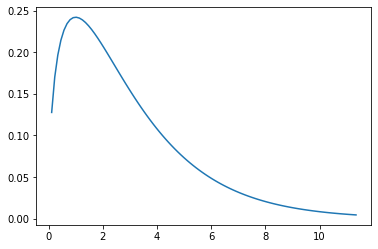

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(chi2.ppf(0.01, 3),chi2.ppf(0.99, 3), 100)
plt.plot(x, chi2.pdf(x, 3))
plt.show()

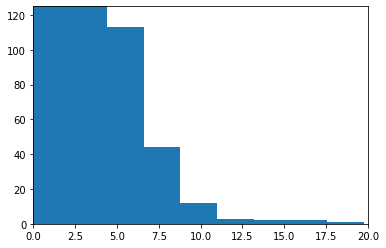

In [38]:
plt.hist(x_v, bins = 100)
plt.axis([0, 20, 0, 125])
plt.show()

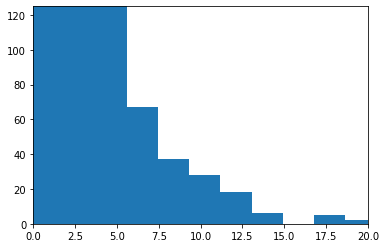

In [34]:
plt.hist(x_f, bins = 100)
plt.axis([0, 20, 0, 125])
plt.show()

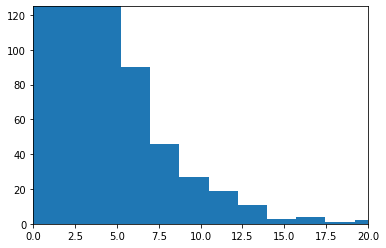

In [35]:
plt.hist(x_h, bins = 100)
plt.axis([0, 20, 0, 125])
plt.show()

In [36]:
len(x_h)

1000

In [41]:
lamda_MLE

[0.5213266275096291,
 0.5887920992097707,
 0.34167724710972047,
 0.28788794066663614,
 0.4627858021997788,
 0.5491397952103845,
 0.5830134455581861,
 0.4642372557733326,
 0.6374061234937052,
 0.3840618753071298,
 0.528414642401296,
 0.7273429918192221,
 0.6355944699121059,
 0.5465929847987901,
 0.6692106428393689,
 0.6336677277148921,
 0.45598951483406736,
 0.6385947225548064,
 0.6991870548647289,
 0.48822806625690934,
 0.3693340727145632,
 0.5033291484840547,
 0.47117041887151184,
 0.6264663137622168,
 0.3968581184386374,
 0.5596901936009323,
 0.5070007820775602,
 0.499984501225171,
 0.4237761784247609,
 0.6624281197654247,
 0.48118794186921066,
 0.7169383652025917,
 0.6342134380111256,
 0.4893229873670161,
 0.422194457321191,
 0.5433253209825393,
 0.4671685830468054,
 0.4619566067306314,
 0.5898214983533085,
 0.6238829172937006,
 0.5402063073285539,
 0.562914408685704,
 0.6303589482867783,
 0.31653099908727717,
 0.3553333548552103,
 0.4761552687438063,
 0.5655866640420781,
 0.5005238